# Supplementary Notebook 2: Re-running T-cell case studyhealthy/IPF case study with G2G v0.2.0

In [1]:
import anndata
import numpy as np
import seaborn as sb
import numpy as np
import warnings
import scanpy as sc
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

from genes2genes import Main
from genes2genes import ClusterUtils
from genes2genes import TimeSeriesPreprocessor
from genes2genes import PathwayAnalyser
from genes2genes import VisualUtils

## in vitro vs in vivo T-cell trajectory alignment

In [5]:
adata_ref = anndata.read_h5ad('adata_ref_spt.h5ad')
adata_query = anndata.read_h5ad('adata_ato_spt.h5ad') 
print(adata_ref.X.data) 
print(adata_query.X.data)
gene_list = adata_ref.var_names
print(len(gene_list))
n_bins = 14

[1.6547761  3.421763   3.27304    ... 0.95708966 0.95708966 1.4370381 ]
[1.0180244  1.0180244  1.0180244  ... 0.87026346 0.5269568  1.1253548 ]
1371


In [6]:
import time
s = time.time()
aligner = Main.RefQueryAligner(adata_ref, adata_query, gene_list, n_bins)
aligner.align_all_pairs() 
t = time.time()
print('Time taken:', t-s,'sec')

Genes2Genes (v0.2.0)
Dynamic programming alignment of gene pseudotime trajectories using a bayesian information-theoretic framework
Interpolator initialization completed
Aligner initialised to align trajectories of 20327 reference cells & 17176 query cells in terms of 1371 genes
Running gene-level alignment: 🧬


100%|██████████| 1371/1371 [11:45<00:00,  1.94it/s]

Alignment completed! ✅
Time taken: 709.1007261276245 sec


In [1]:
709.1007261276245/60

11.818345435460408

Average Alignment:  IIIDDMMMMMMMMMMMD (cell-level)
% similarity: 64.71


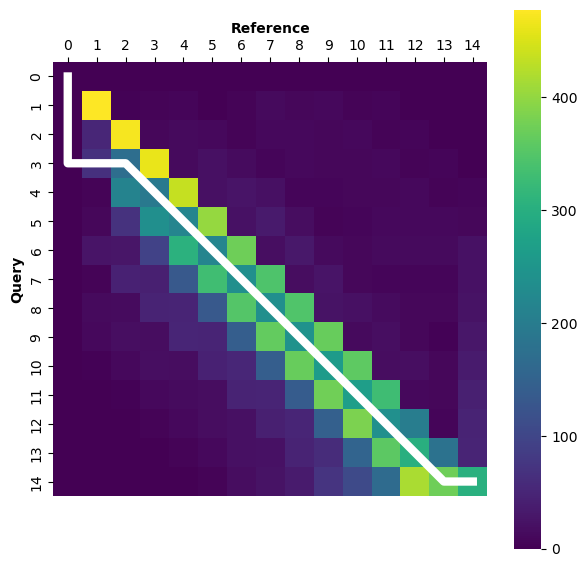

In [7]:
aligner.get_aggregate_alignment() 

Mean alignment similarity percentage (matched %): 
65.67 %


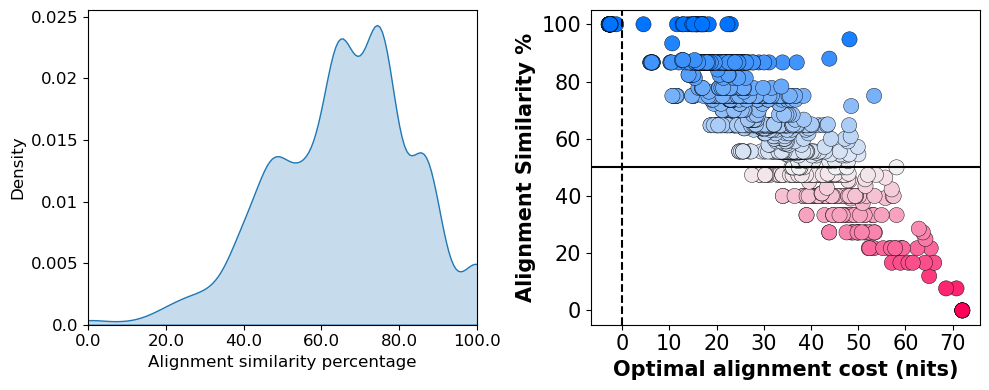

In [8]:
df = aligner.get_stat_df()

In [9]:
import time
s = time.time()
aligner = Main.RefQueryAligner(adata_ref, adata_query, gene_list, n_bins)
aligner.align_all_pairs(concurrent=True) 
t = time.time()
print('Time taken:', t-s,'sec')

Genes2Genes (v0.2.0)
Dynamic programming alignment of gene pseudotime trajectories using a bayesian information-theoretic framework
Interpolator initialization completed
Aligner initialised to align trajectories of 20327 reference cells & 17176 query cells in terms of 1371 genes
Running gene-level alignment: 🧬
concurrent mode, running with  26  processes


100%|██████████| 1371/1371 [24:43<00:00,  1.08s/it]


Alignment completed! ✅
Time taken: 1491.372834444046 sec


In [7]:
1491.372834444046/60

24.856213907400768

## Healthy vs. IPF trajectory alignment

In [2]:
adata_healthy = anndata.read_h5ad('adata_healthy_AT2_to_AT1.h5ad')
adata_disease = anndata.read_h5ad('adata_IPF_AT2_to_AberrantB.h5ad')
adata_healthy.obs['time'] = adata_healthy.obs['dpt_pseudotime']
adata_disease.obs['time'] = adata_disease.obs['dpt_pseudotime']
adata_ref = adata_healthy
adata_query = adata_disease
print(adata_ref.X.data) 
print(adata_query.X.data)
sc.pp.normalize_per_cell(adata_ref, 10000) 
sc.pp.log1p(adata_ref)
sc.pp.normalize_per_cell(adata_query, 10000) 
sc.pp.log1p(adata_query)
print(adata_ref.X.data)
print(adata_query.X.data)
common_hvg_genes = np.intersect1d(adata_healthy.var_names[adata_healthy.var.HVG] , adata_disease.var_names[adata_disease.var.HVG] )
len(common_hvg_genes)
n_bins = 13

[1. 1. 4. ... 1. 1. 1.]
[1. 2. 1. ... 1. 1. 1.]
[1.7595813 1.7595813 3.0076618 ... 1.2661365 1.2661365 1.2661365]
[1.1192989 1.6342111 1.1192989 ... 1.284542  1.284542  1.284542 ]


In [3]:
import time
s = time.time()
aligner = Main.RefQueryAligner(adata_ref, adata_query, common_hvg_genes, n_bins)
aligner.align_all_pairs() 
t = time.time()
print('Time taken:', t-s,'sec')

Genes2Genes (v0.2.0)
Dynamic programming alignment of gene pseudotime trajectories using a bayesian information-theoretic framework
Interpolator initialization completed
Aligner initialised to align trajectories of 3157 reference cells & 890 query cells in terms of 994 genes
Running gene-level alignment: 🧬


100%|██████████| 994/994 [04:29<00:00,  3.69it/s]

Alignment completed! ✅
Time taken: 272.8219108581543 sec


Average Alignment:  MMMMMMMMMMIMDID (cell-level)
% similarity: 73.33


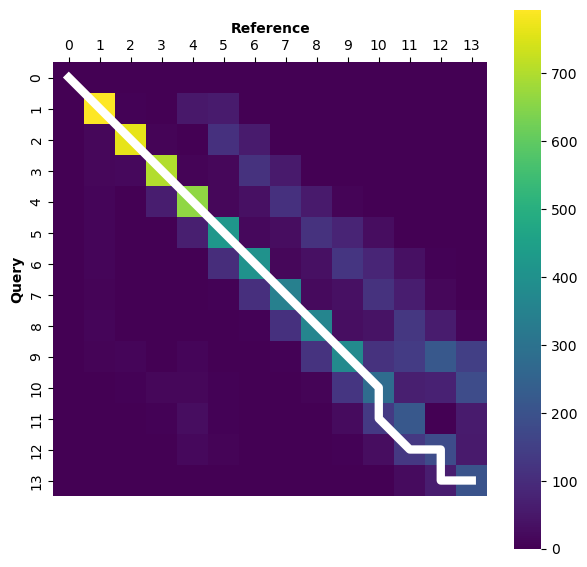

In [4]:
aligner.get_aggregate_alignment() 

In [2]:
 272.8219108581543/60

4.547031847635905

Mean alignment similarity percentage (matched %): 
60.809999999999995 %


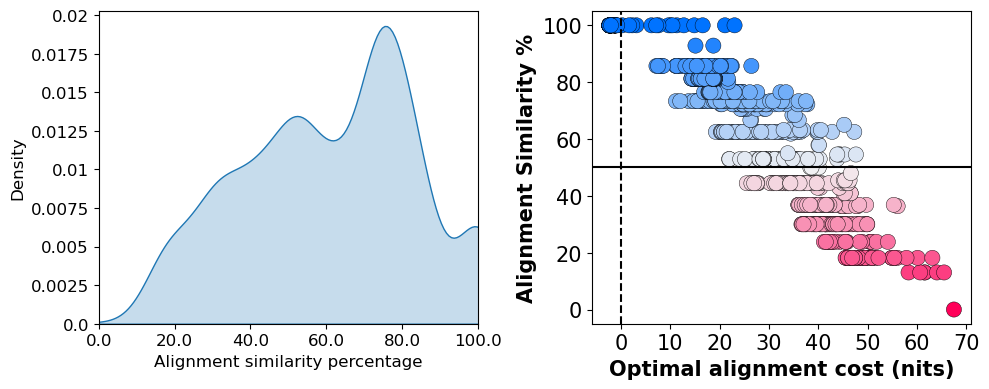

In [5]:
df = aligner.get_stat_df()